In [152]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import pickle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.options.display.max_columns = 99

In [153]:
lda = pickle.load(open("../data/lda_clusters_week_2_cluster_info.pickle", 'rb'))

In [154]:
lda["timestep"] = pd.to_datetime(lda["timestep"])
target_values = ["cat{}_avg".format(i) for i in range(11)]
lda = lda[["timestep"] + target_values].copy()

In [155]:
lda.head()

,timestep,cat0_avg,cat1_avg,cat2_avg,cat3_avg,cat4_avg,cat5_avg,cat6_avg,cat7_avg,cat8_avg,cat9_avg,cat10_avg
0,1958-08-02,0.274434,0.269514,0.455901,0.326027,0.229547,0.206242,0.231762,0.228968,0.191738,0.242538,0.285916
1,1958-08-09,0.259359,0.272524,0.451417,0.321185,0.209374,0.183920,0.229945,0.320396,0.191738,0.240827,0.286398
2,1958-08-16,0.278397,0.283769,0.455144,0.291122,0.205967,0.206762,0.246427,0.233494,0.191738,0.250288,0.294703
3,1958-08-23,0.282060,0.280207,0.445662,0.314947,0.202642,0.200878,0.247508,0.305731,0.191738,0.250288,0.292283
4,1958-08-30,0.281234,0.313165,0.456953,0.315376,0.192908,0.201776,0.252156,0.234258,0.170060,0.242846,0.283094


cat0_avg


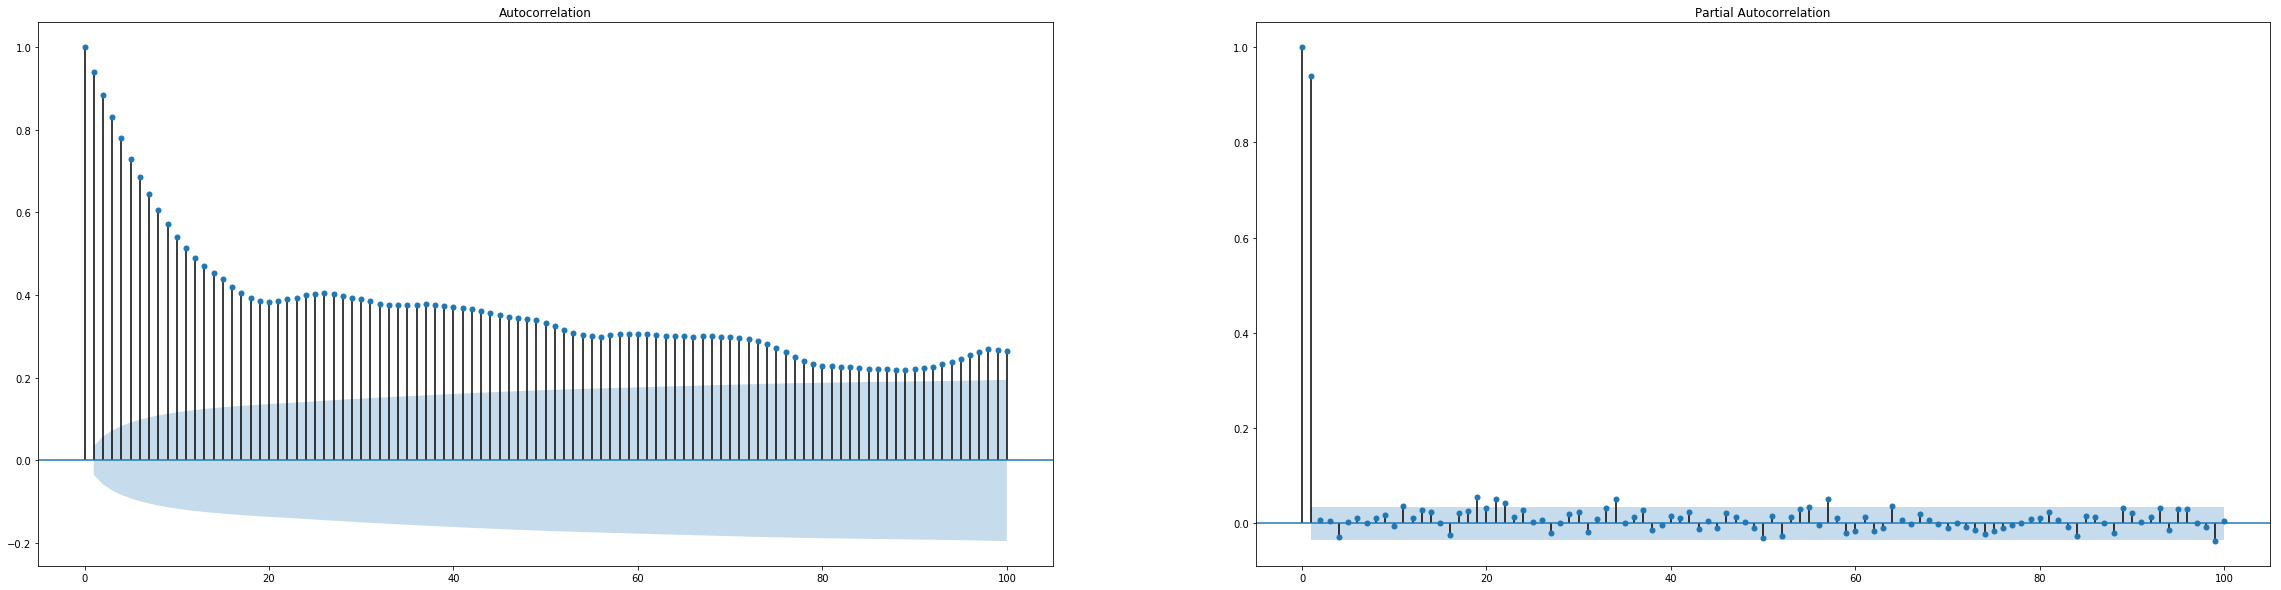

cat1_avg


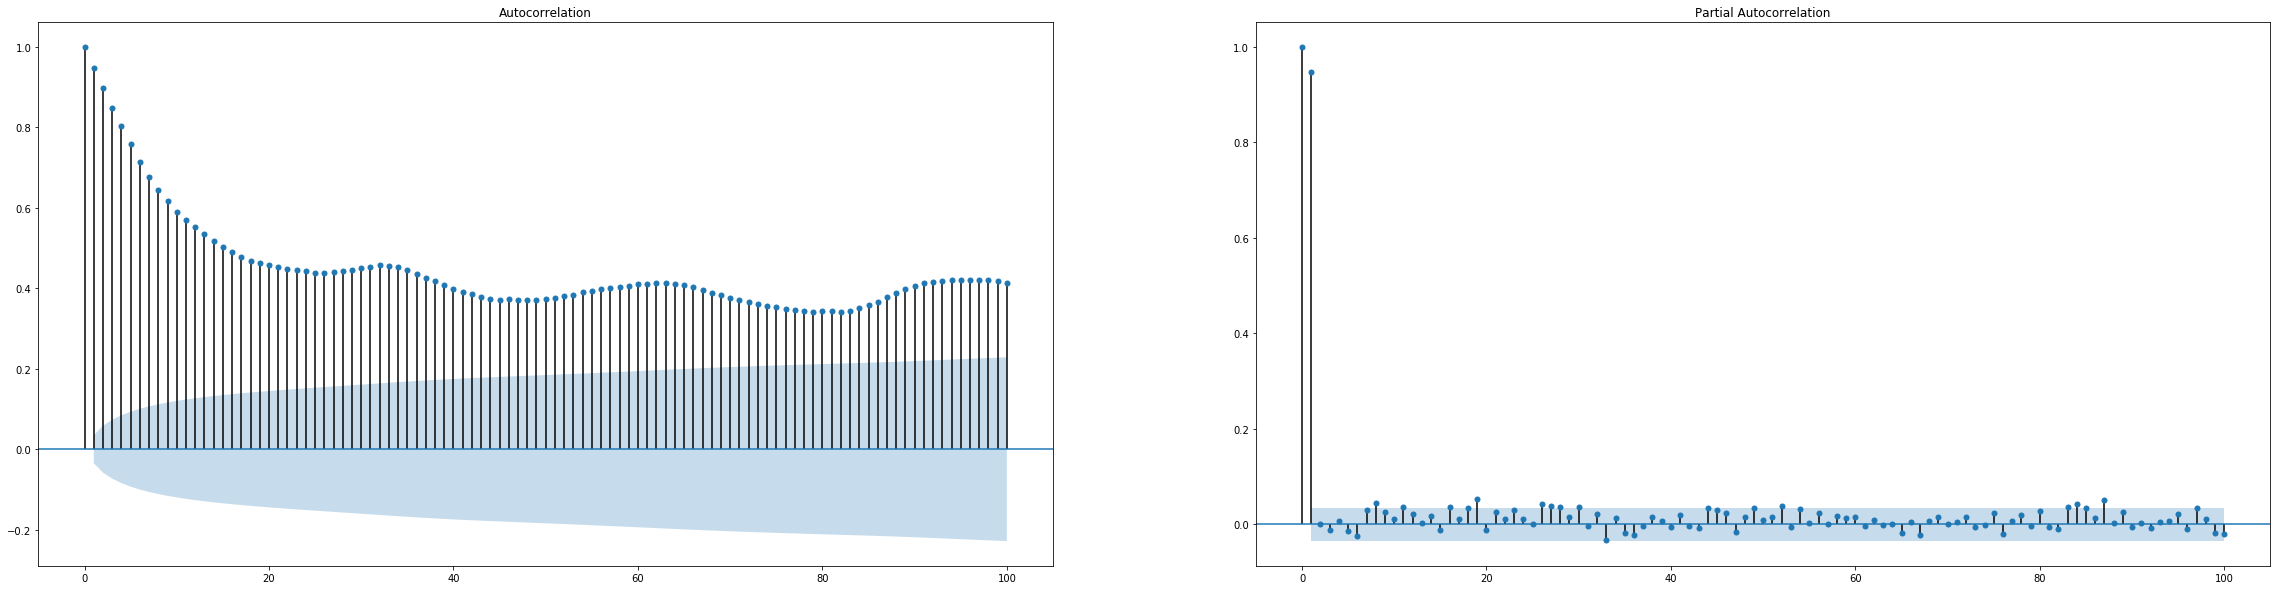

cat2_avg


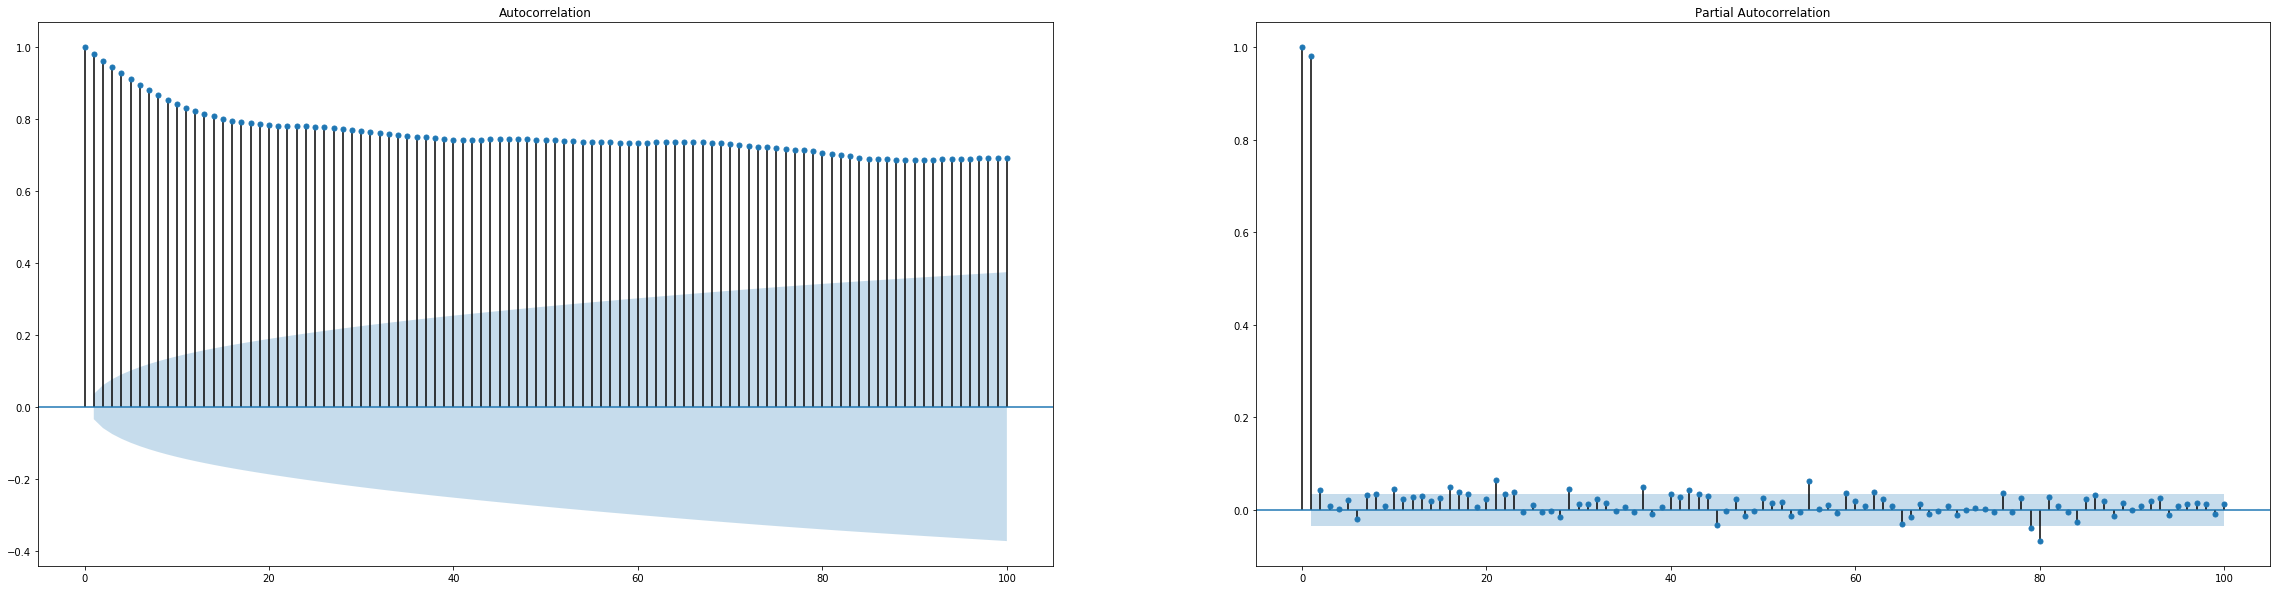

cat3_avg


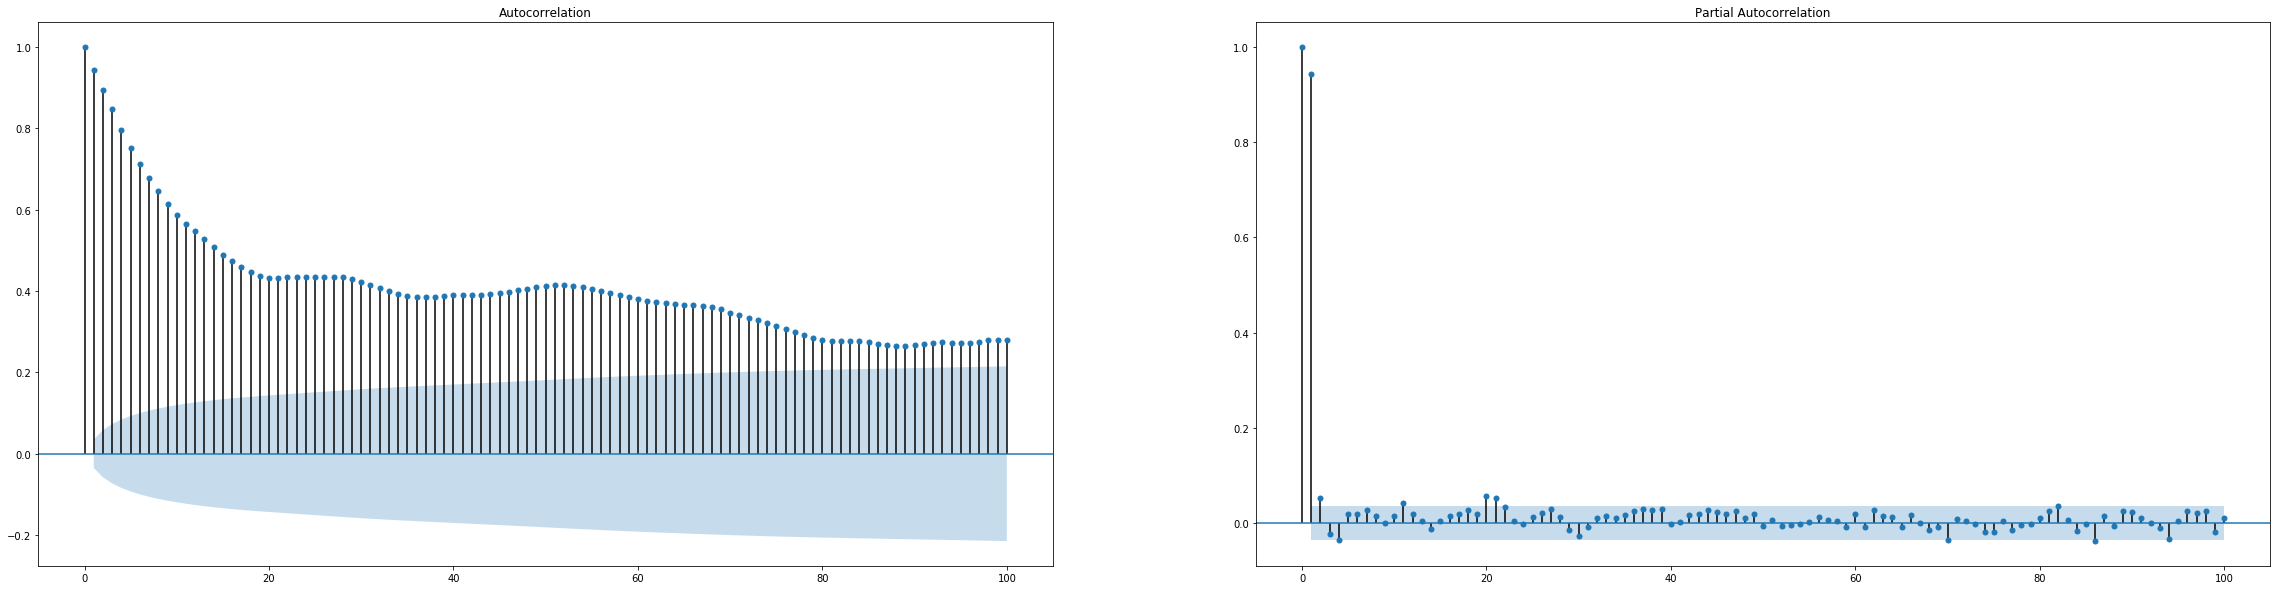

cat4_avg


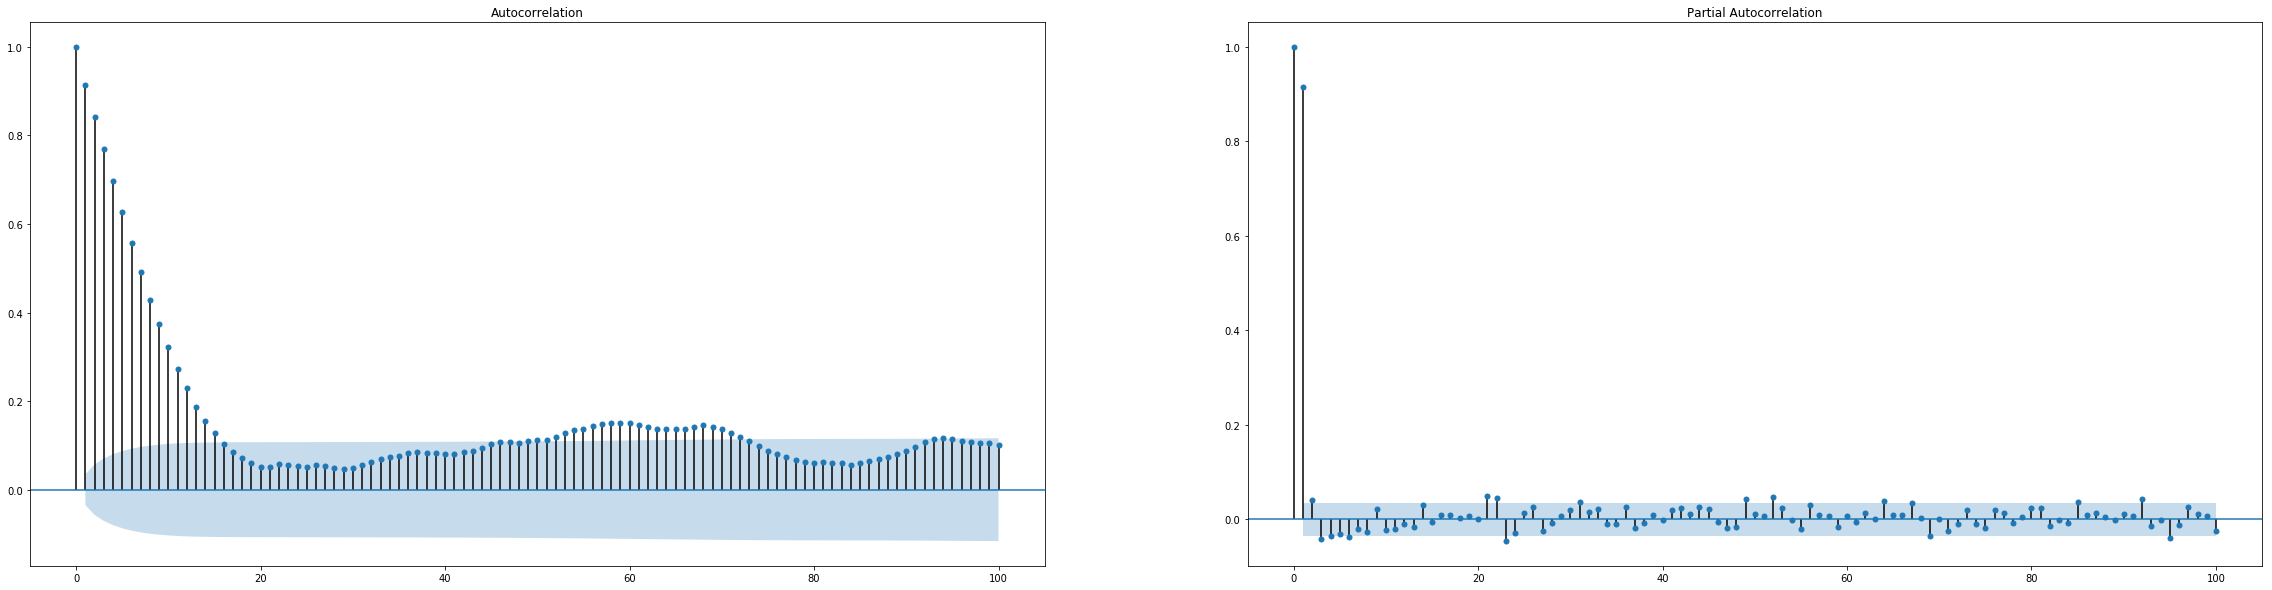

cat5_avg


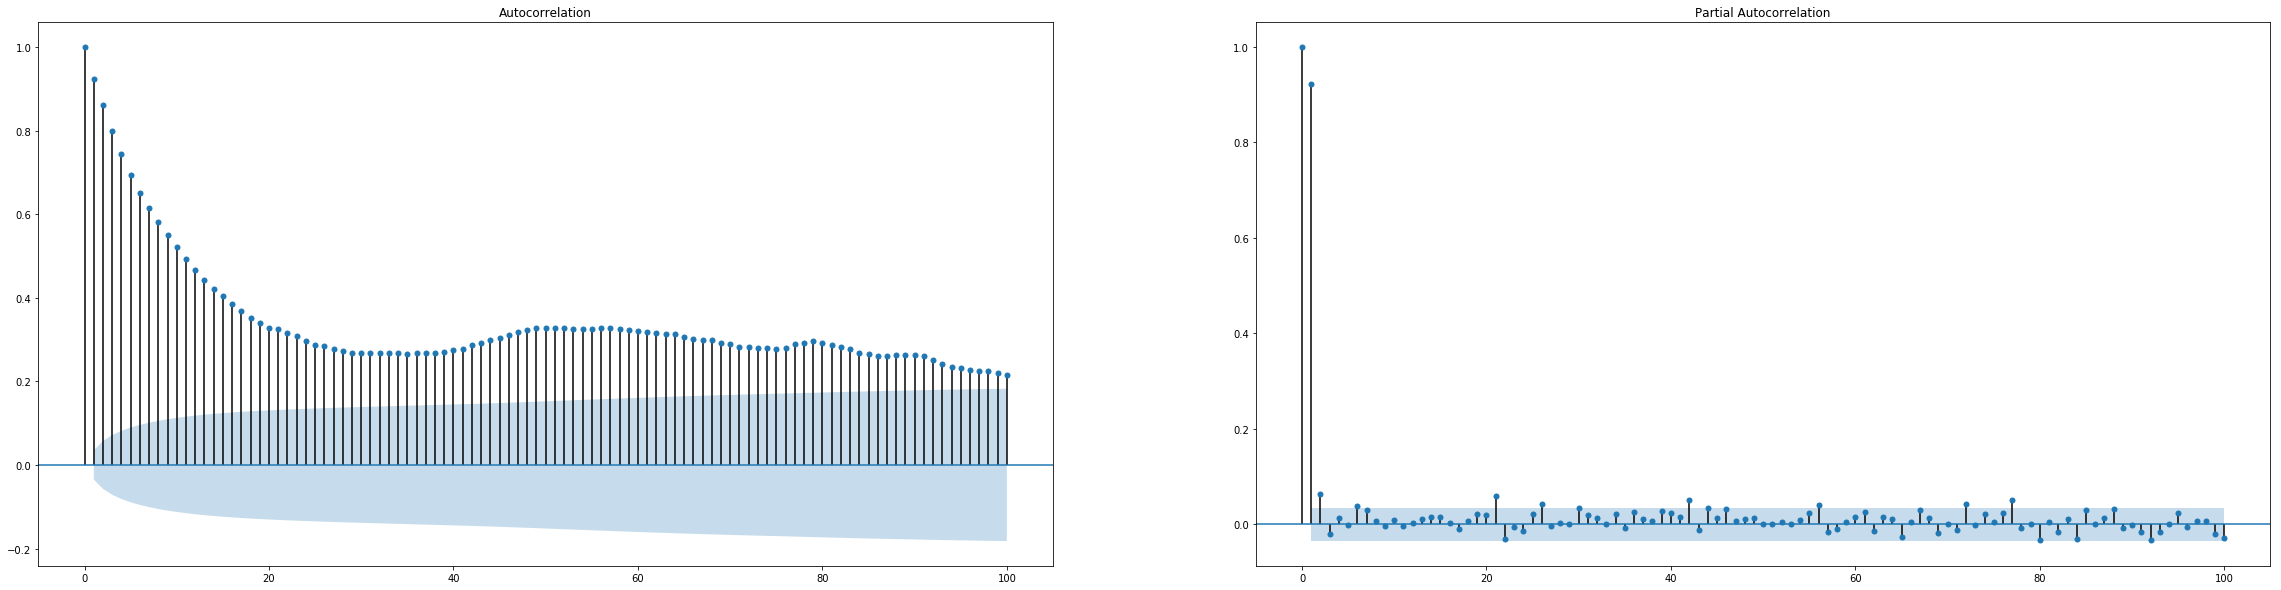

cat6_avg


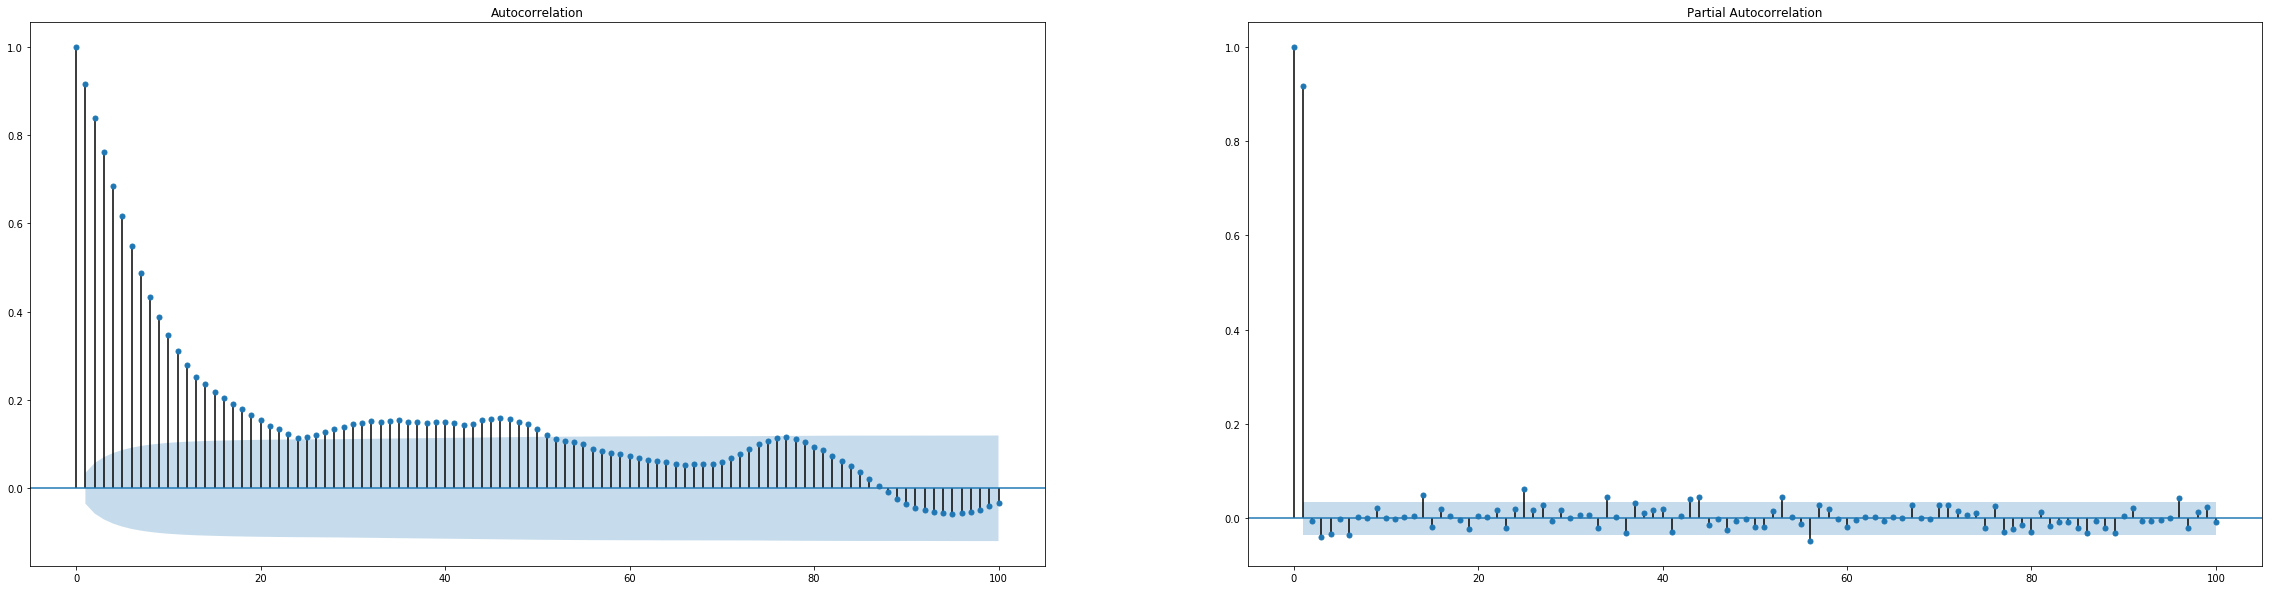

cat7_avg


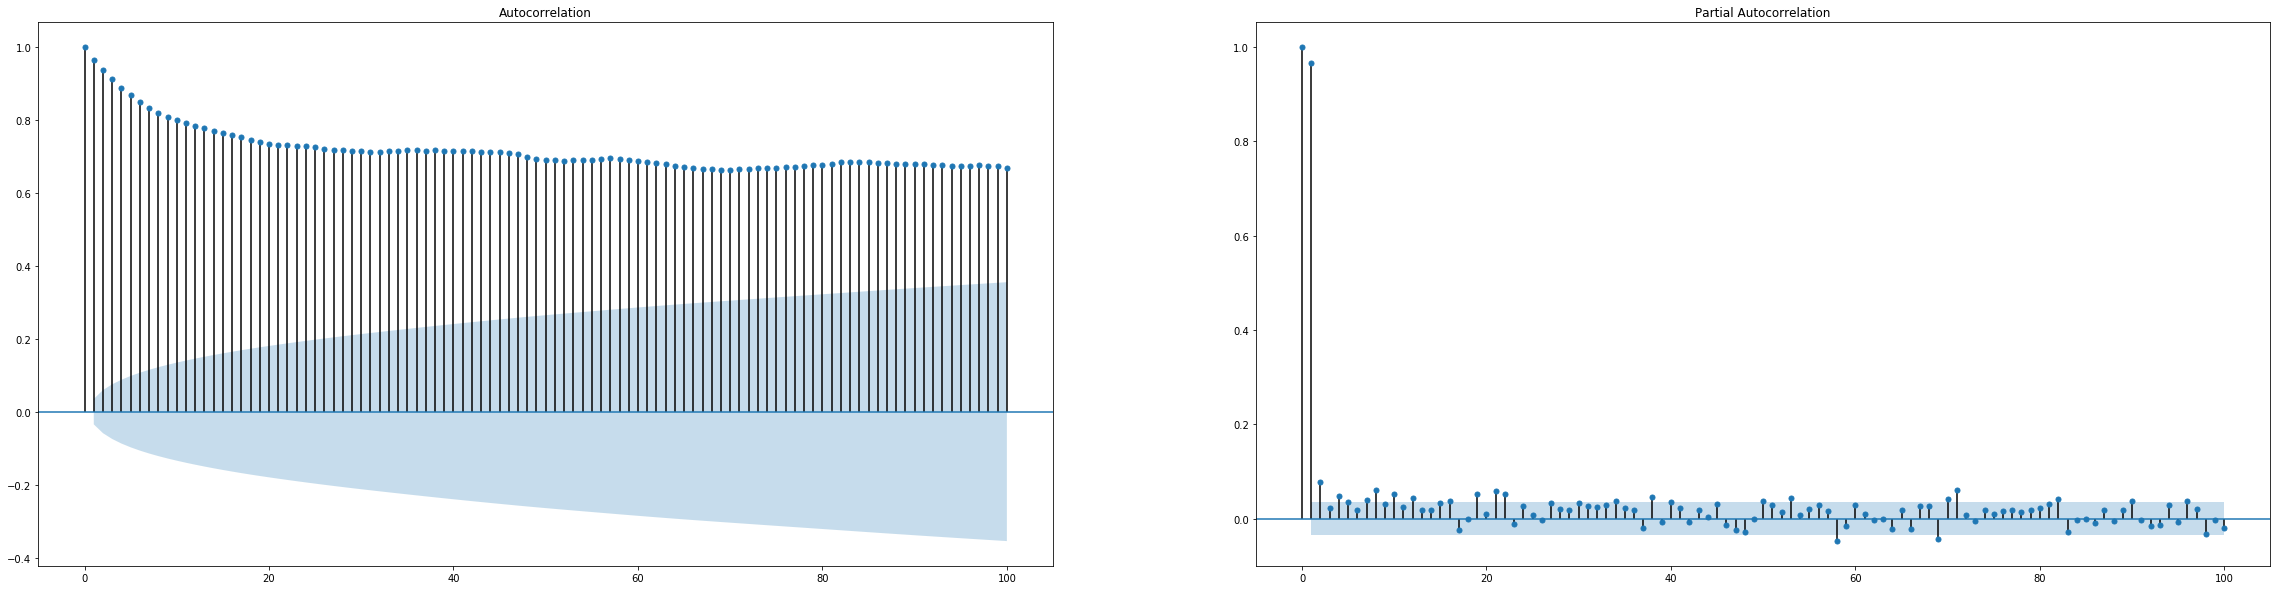

cat8_avg


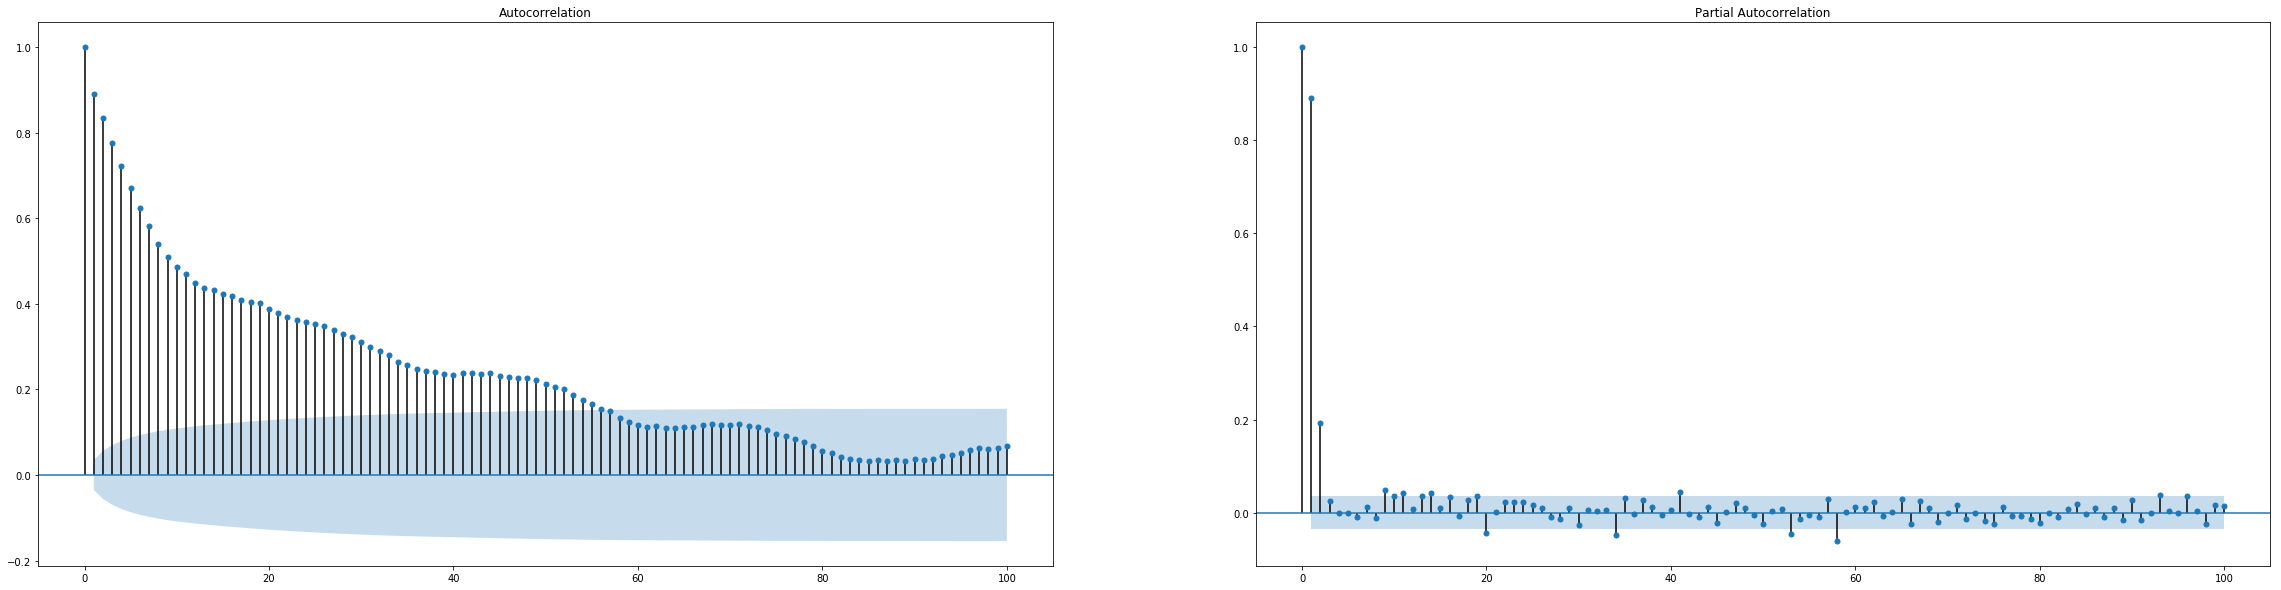

cat9_avg


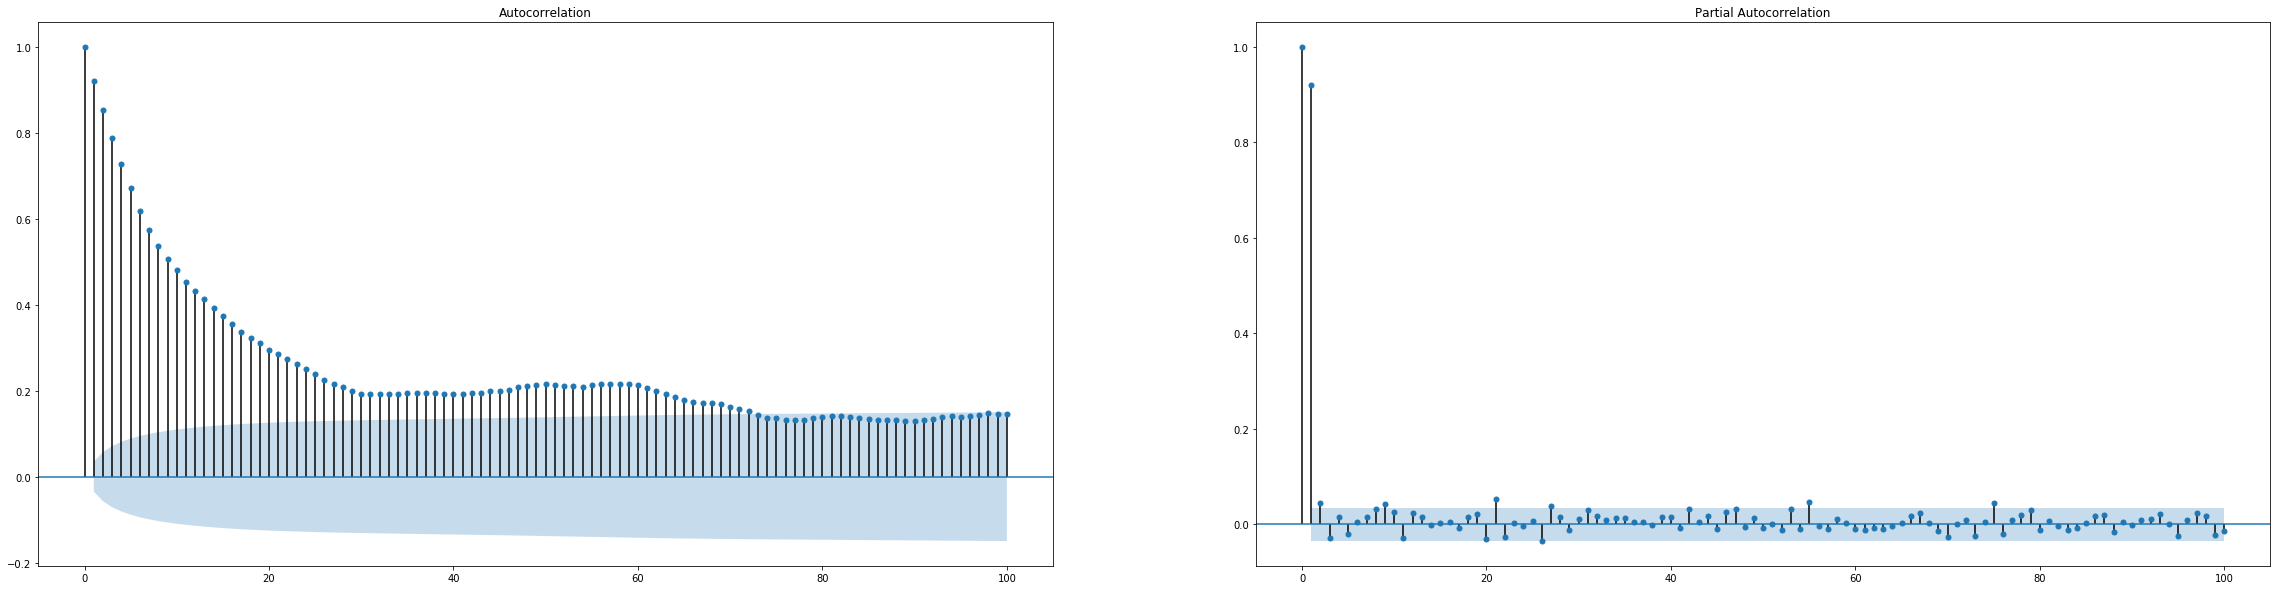

cat10_avg


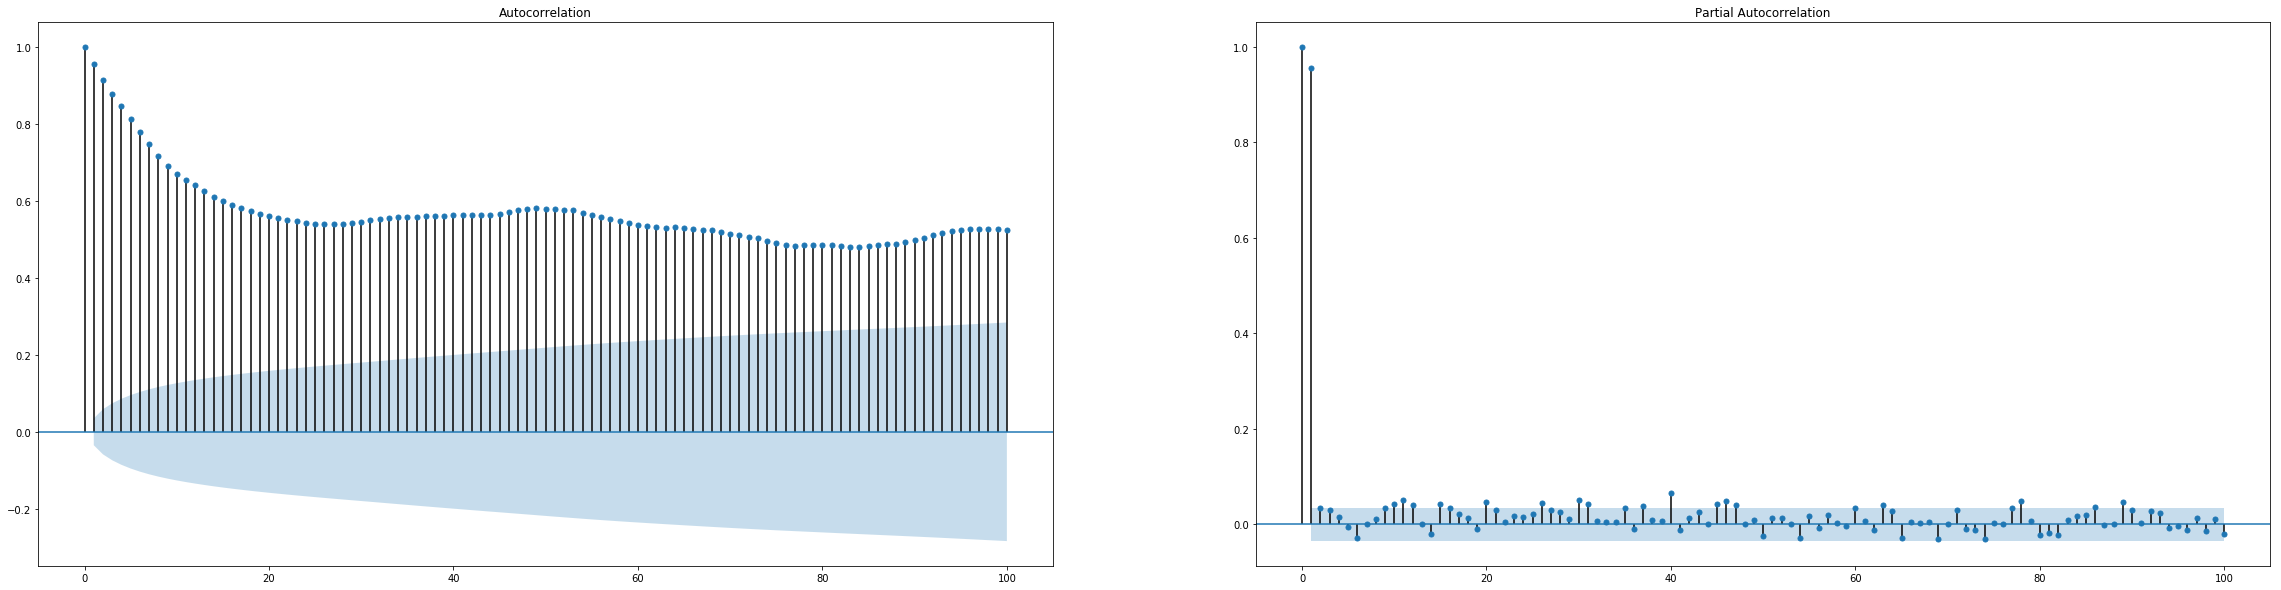

In [156]:
for i in range(len(target_values)):
    print(target_values[i])
    data = lda[target_values[i]]
    plt.subplots(1, 2, figsize=(40, 10))
    ax = plt.subplot(1, 2, 1)
    plot_acf(data, ax = ax, lags=100)
    ax = plt.subplot(1, 2, 2)
    plot_pacf(data, ax = ax, lags=100)
    plt.show()

In [157]:
for i in range(len(target_values)):
    data = lda[target_values[i]]
    lda["{}_detrended".format(target_values[i])] = [np.nan] + [i-j for i, j in zip(data[1:], data[:-1])]

cat0_avg


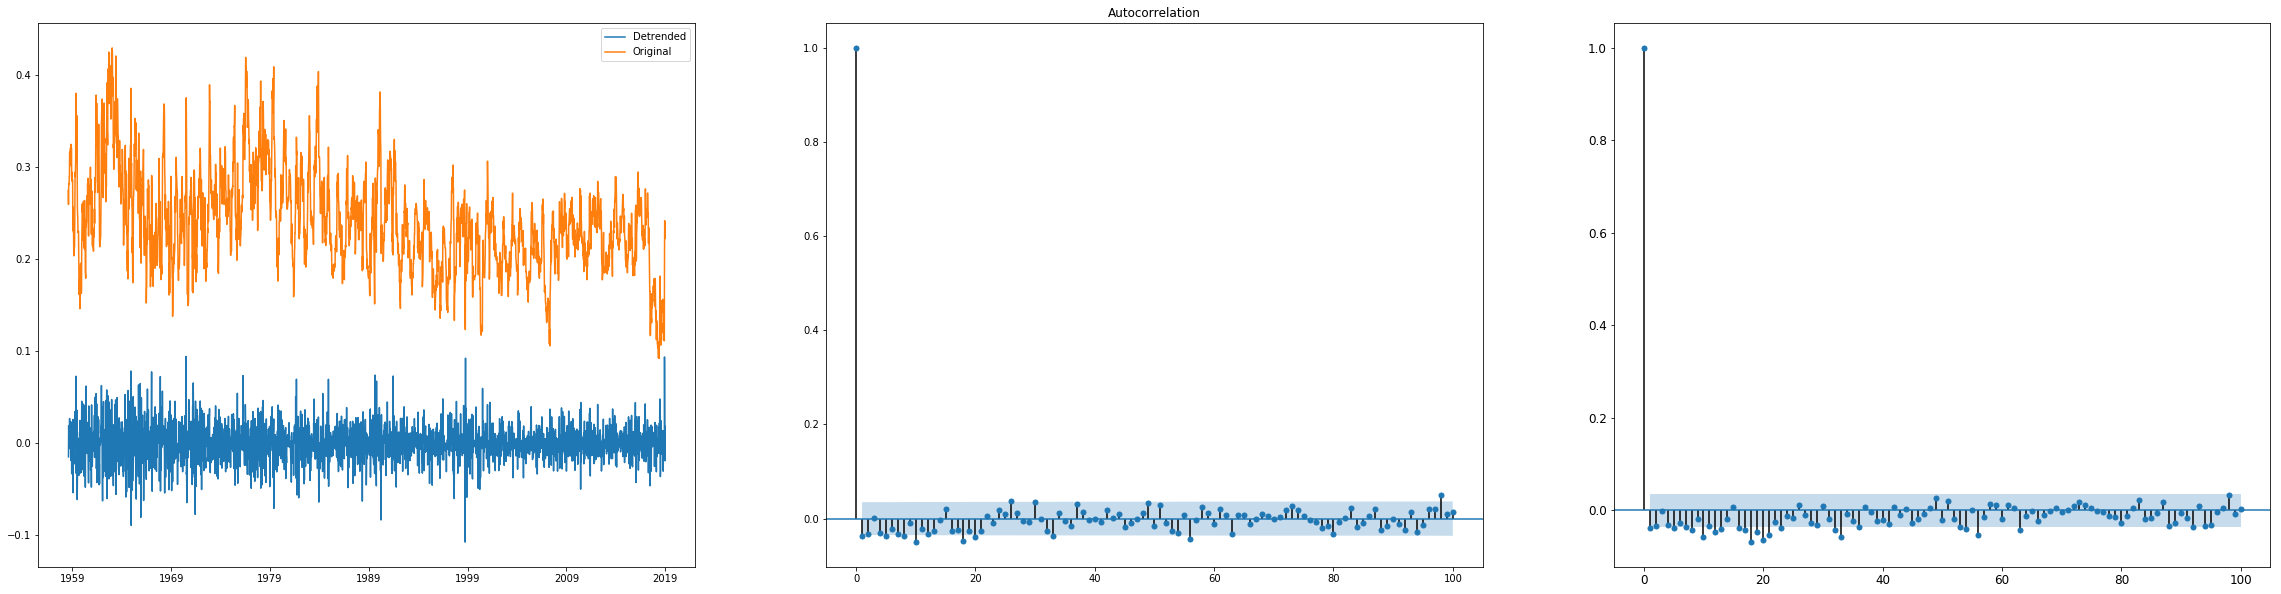

cat1_avg


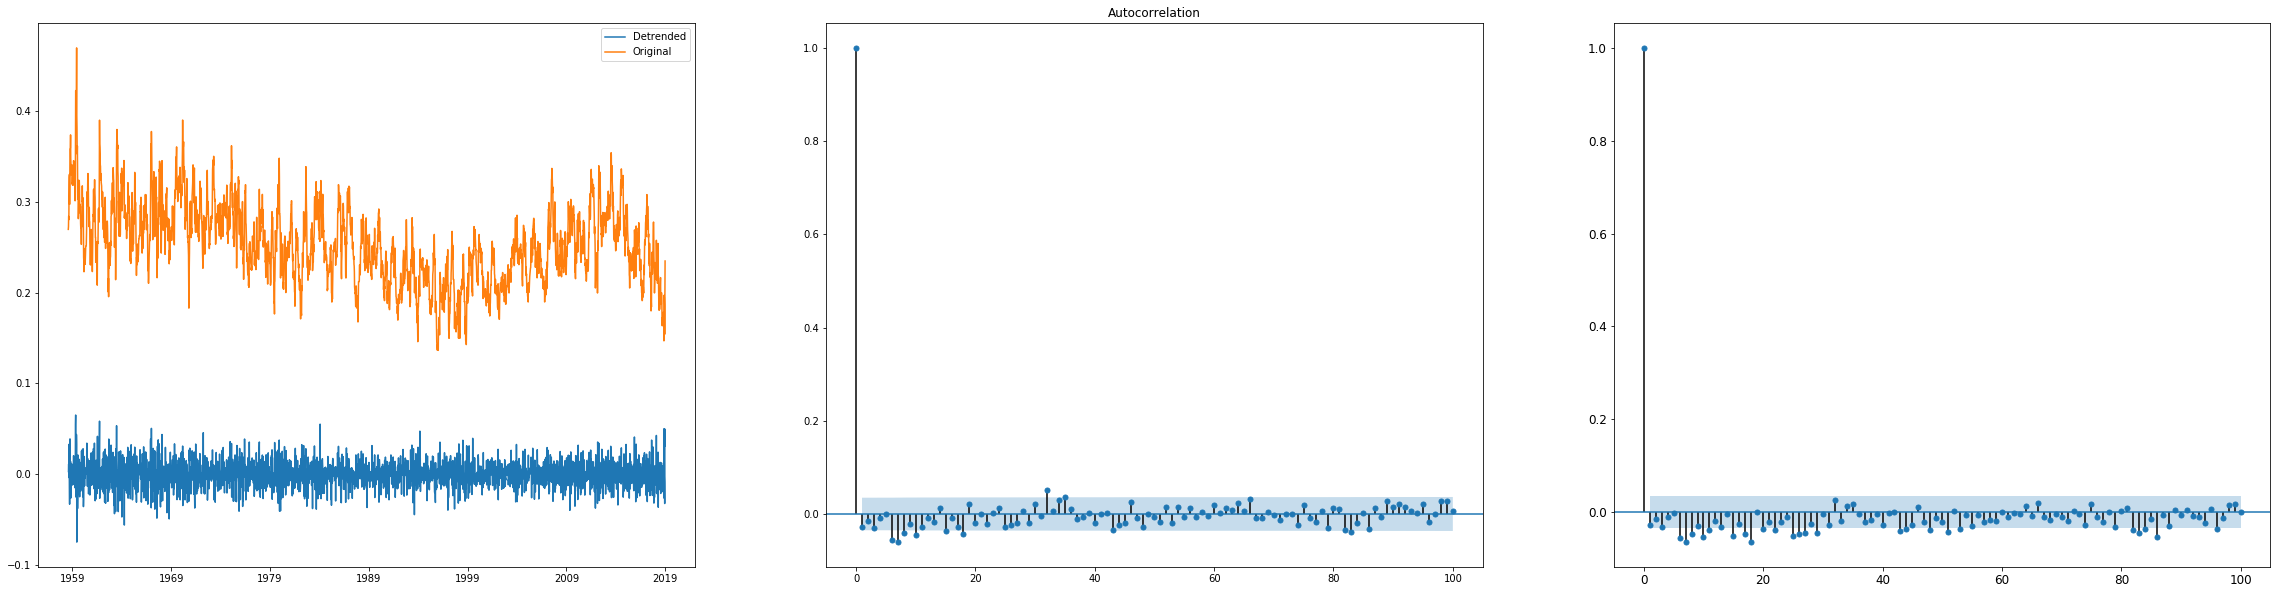

cat2_avg


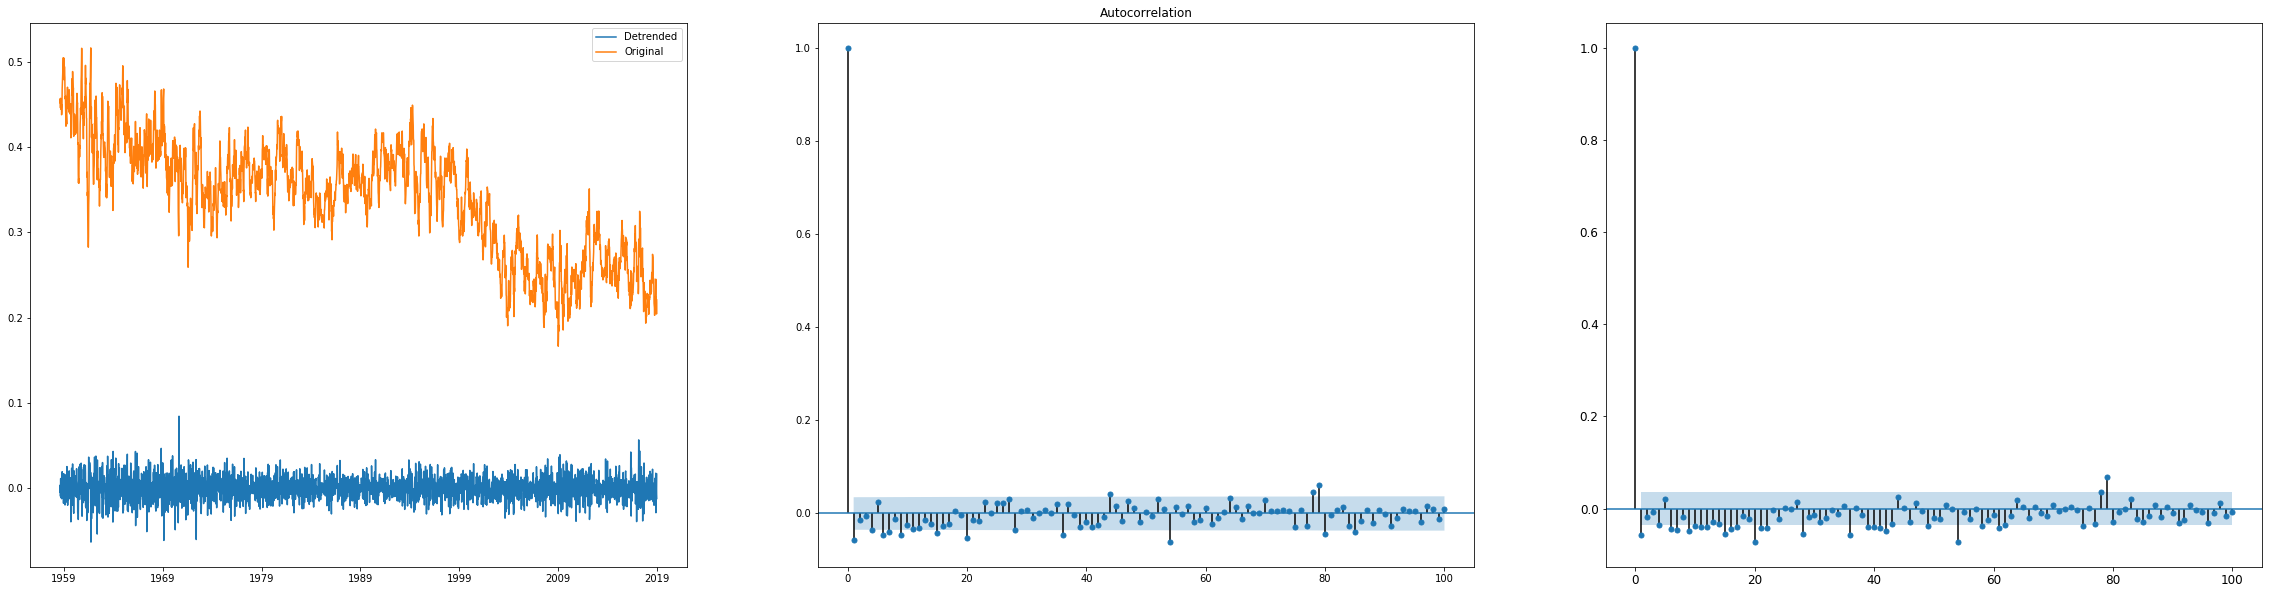

cat3_avg


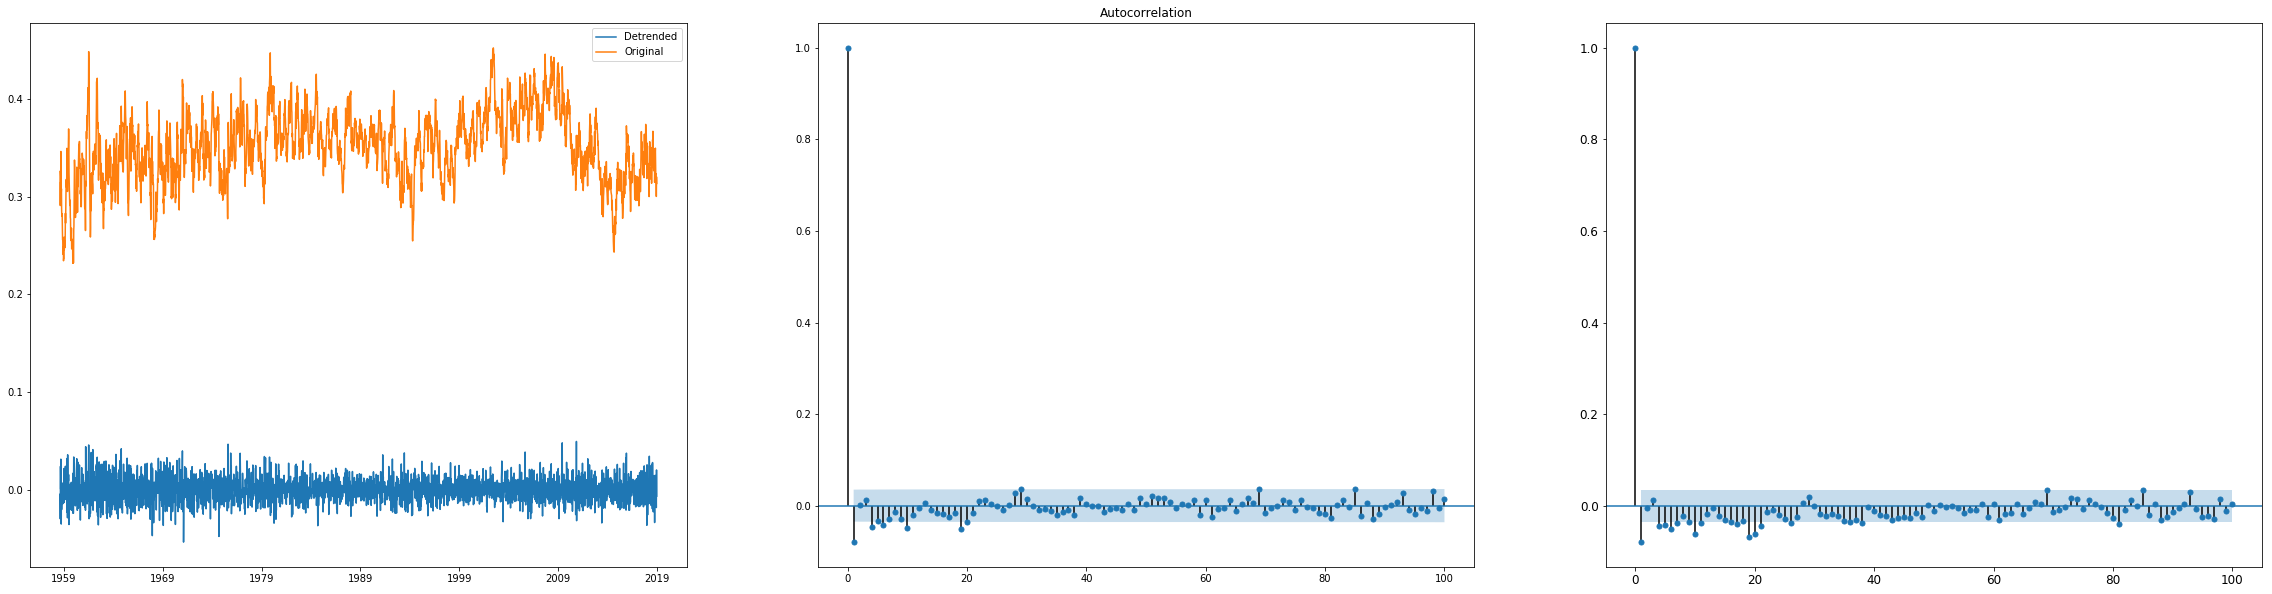

cat4_avg


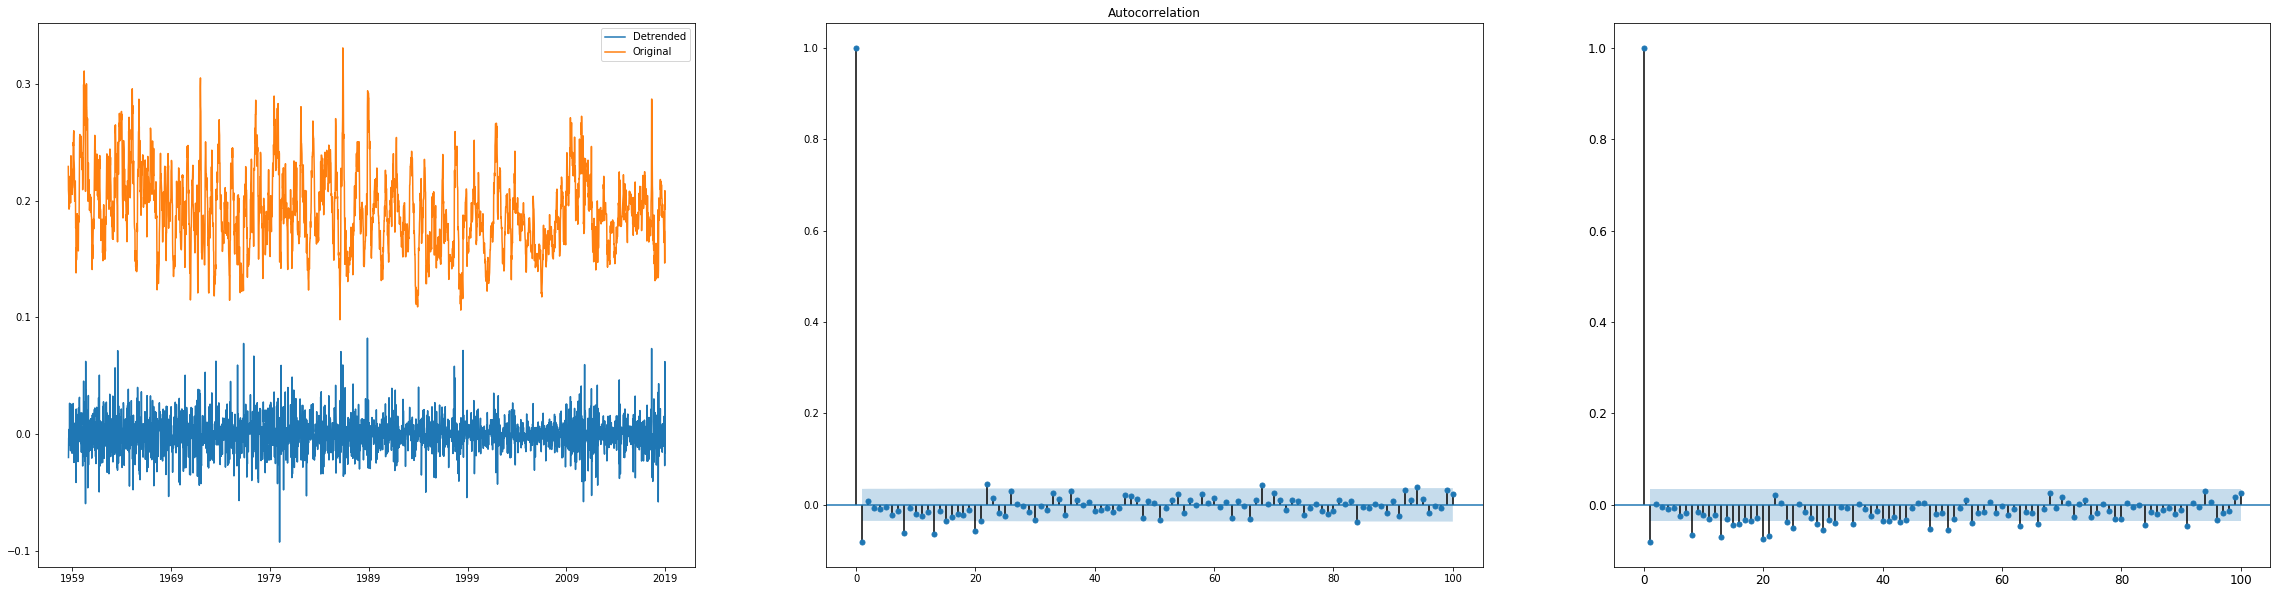

cat5_avg


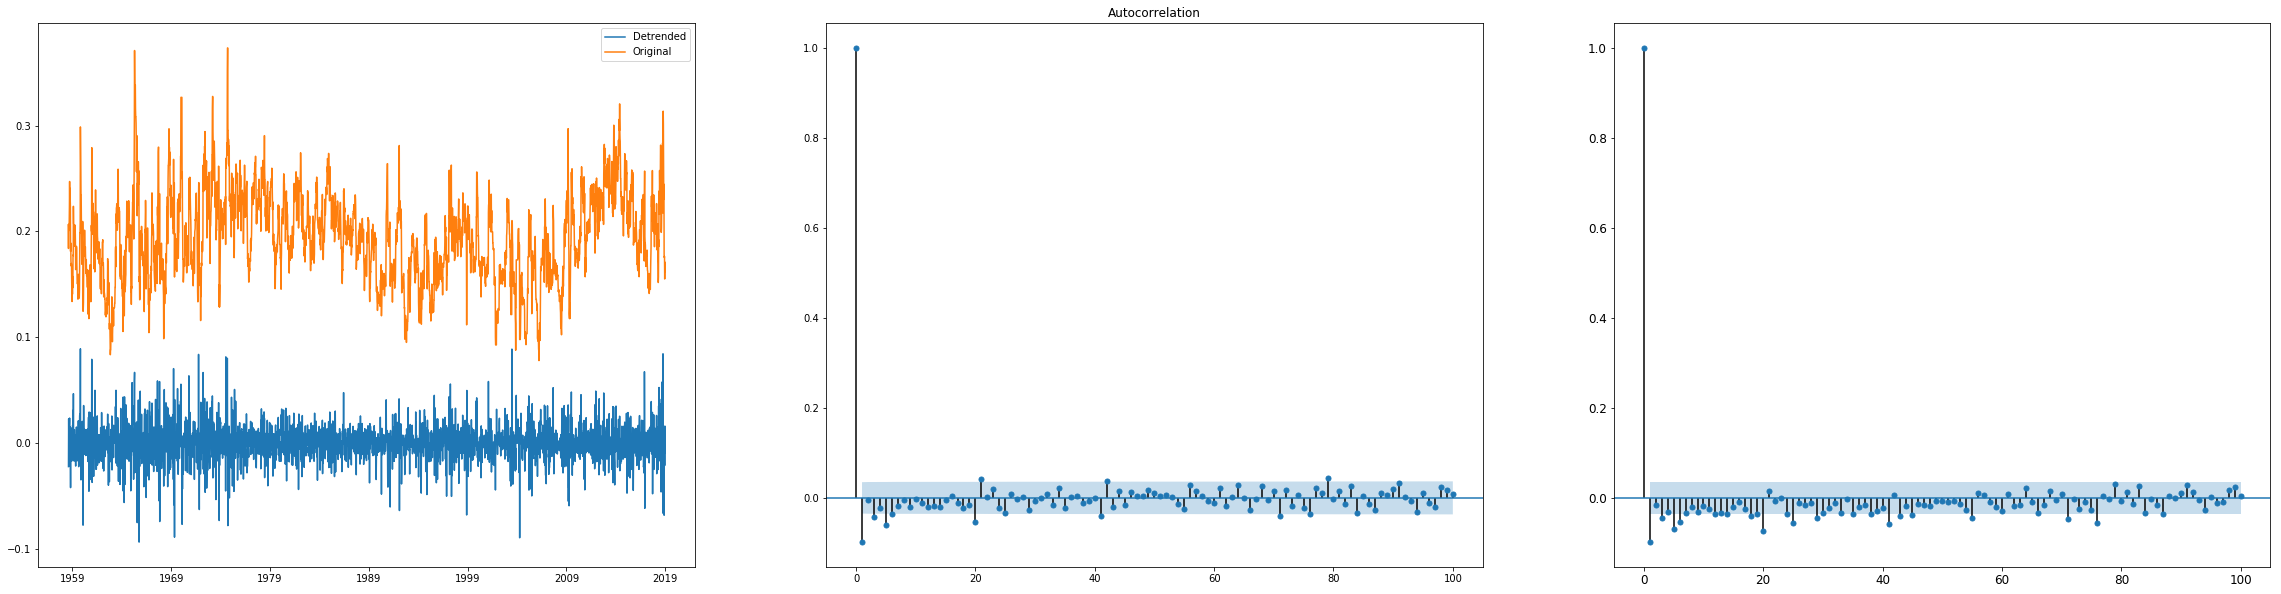

cat6_avg


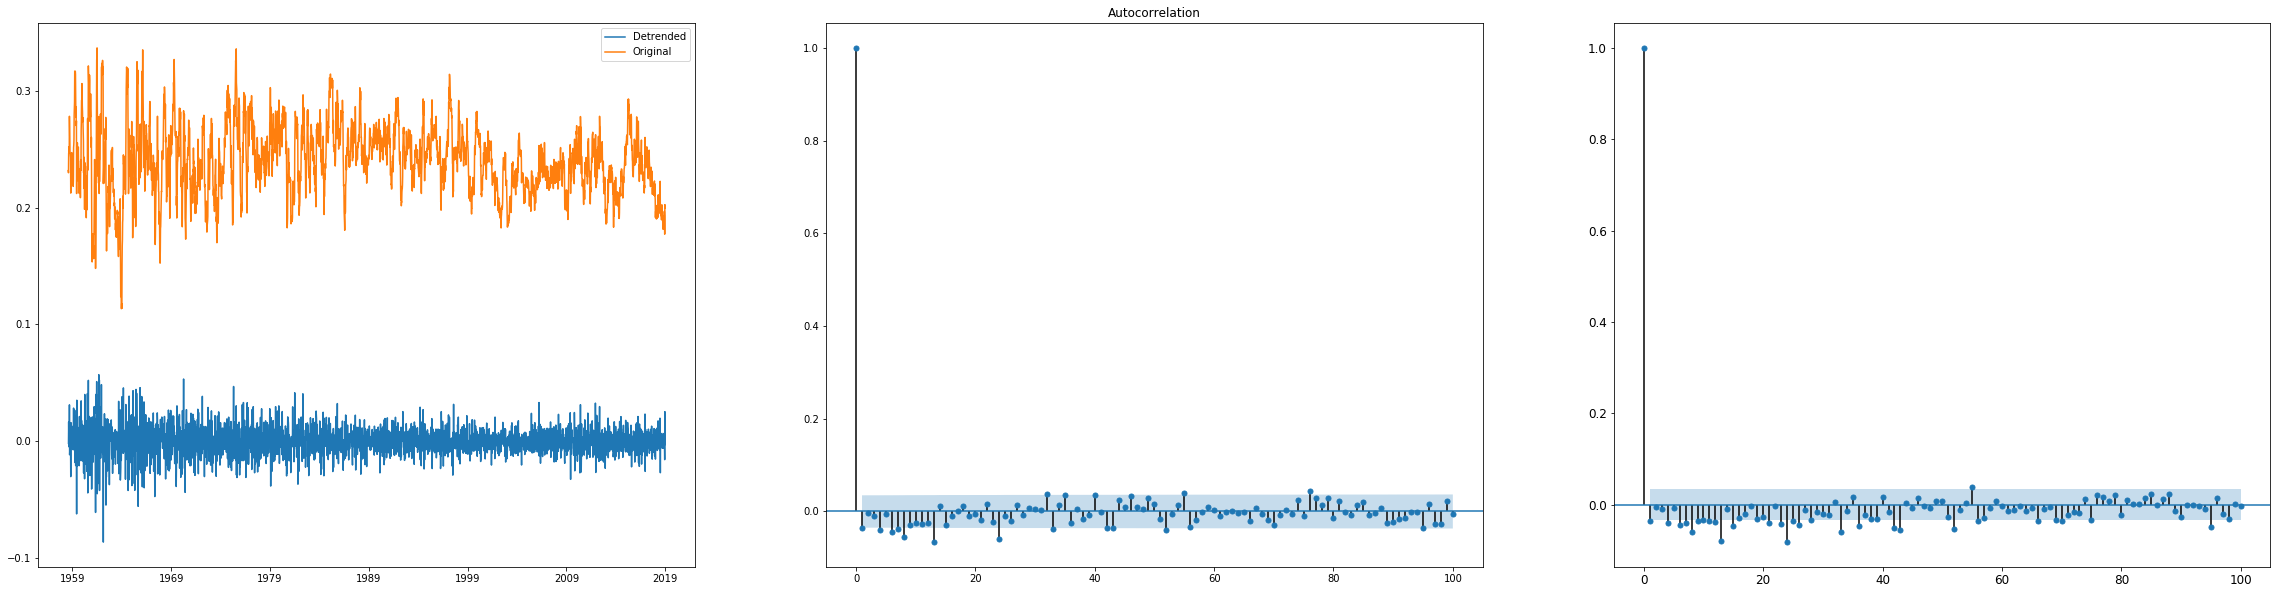

cat7_avg


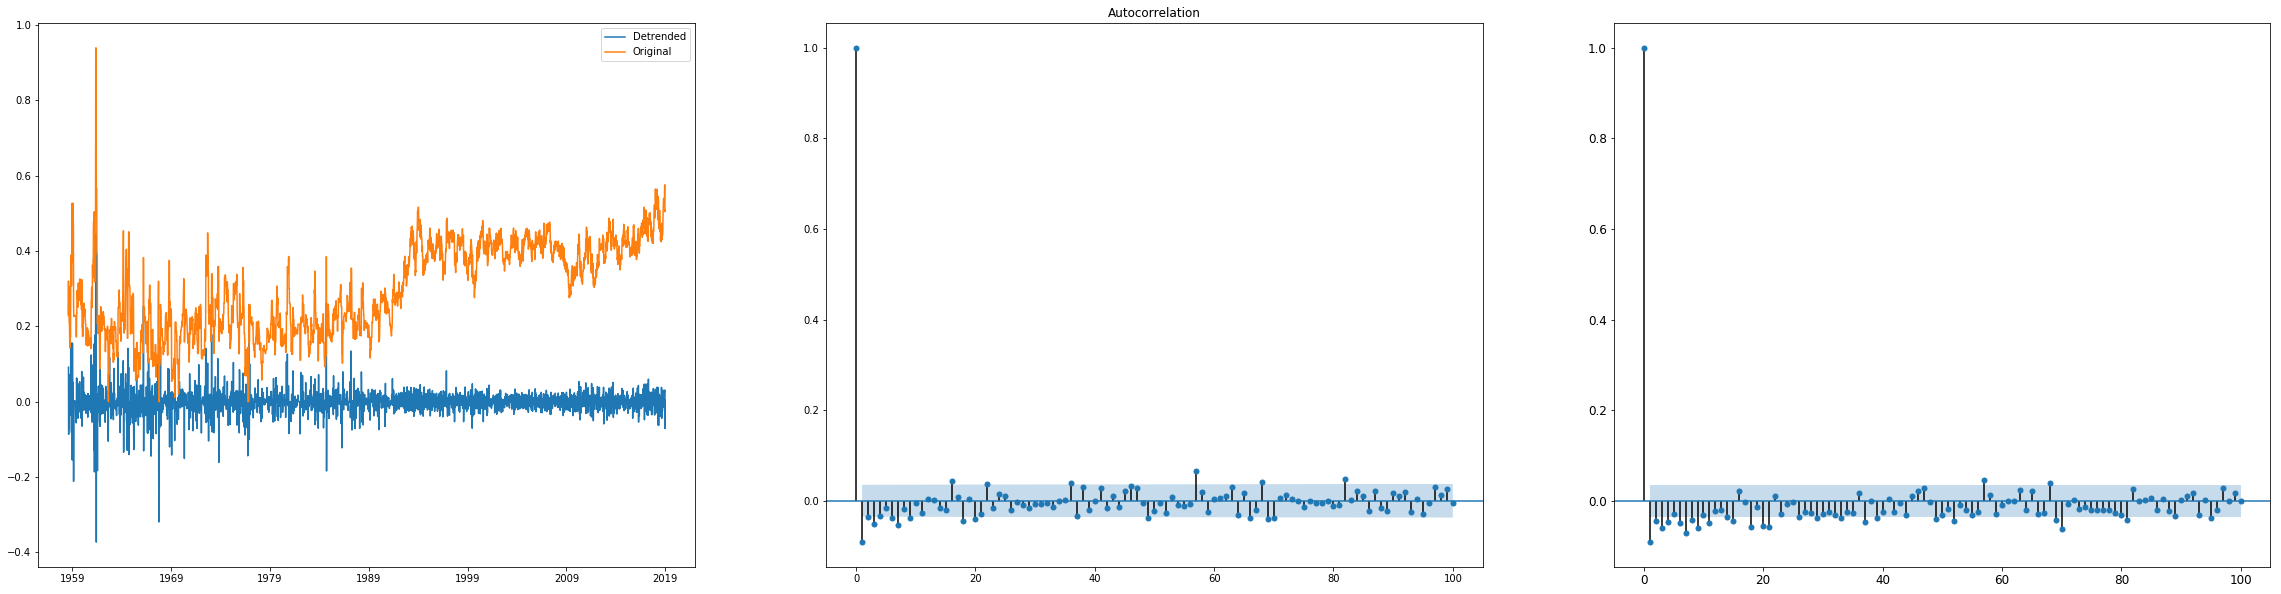

cat8_avg


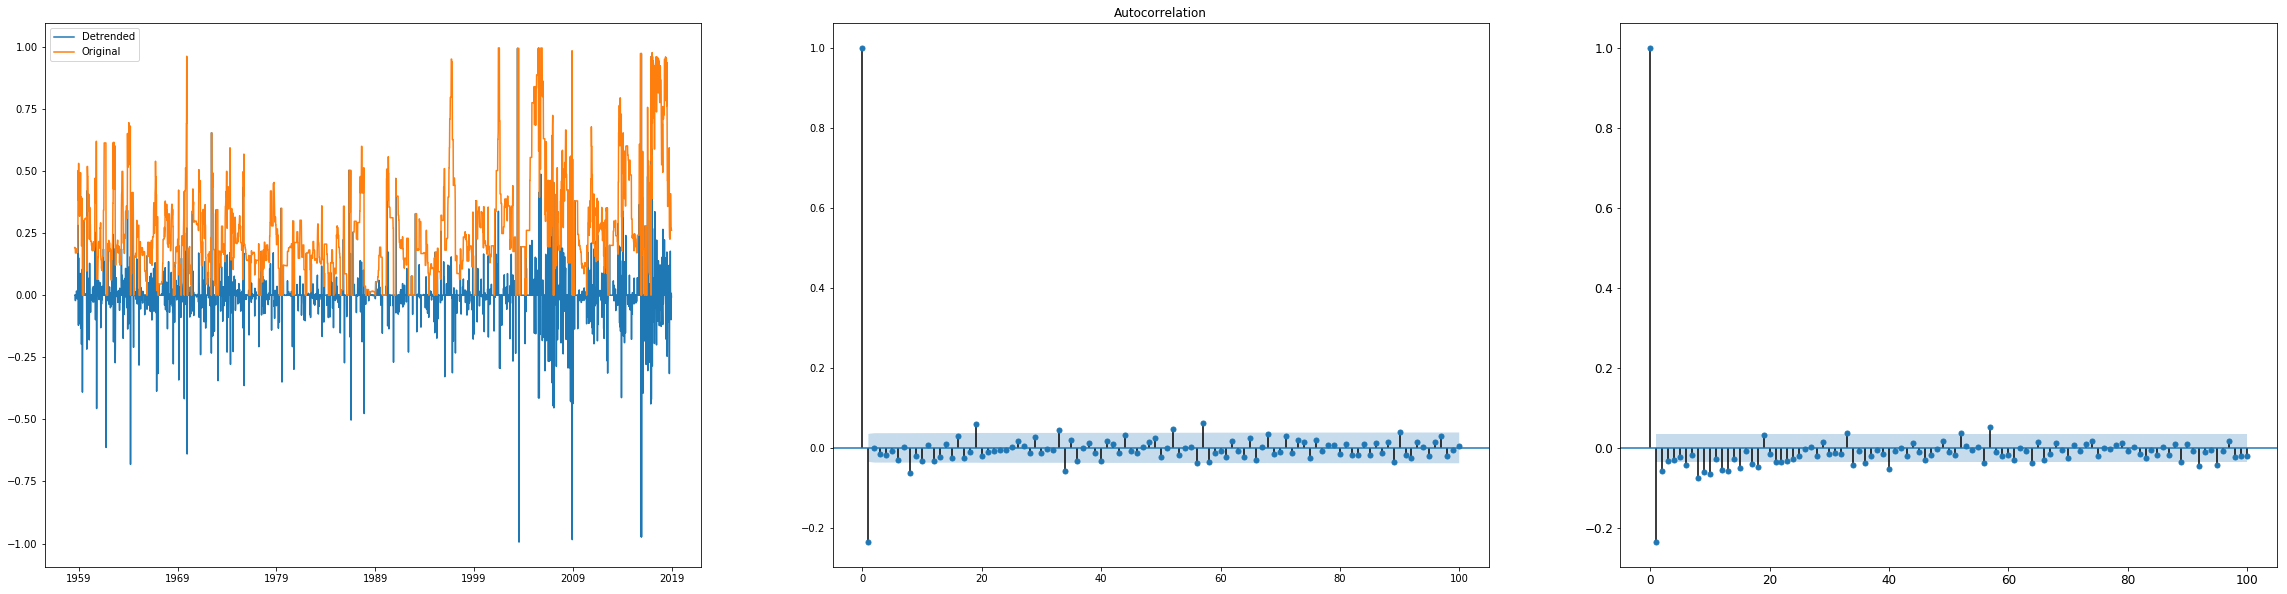

cat9_avg


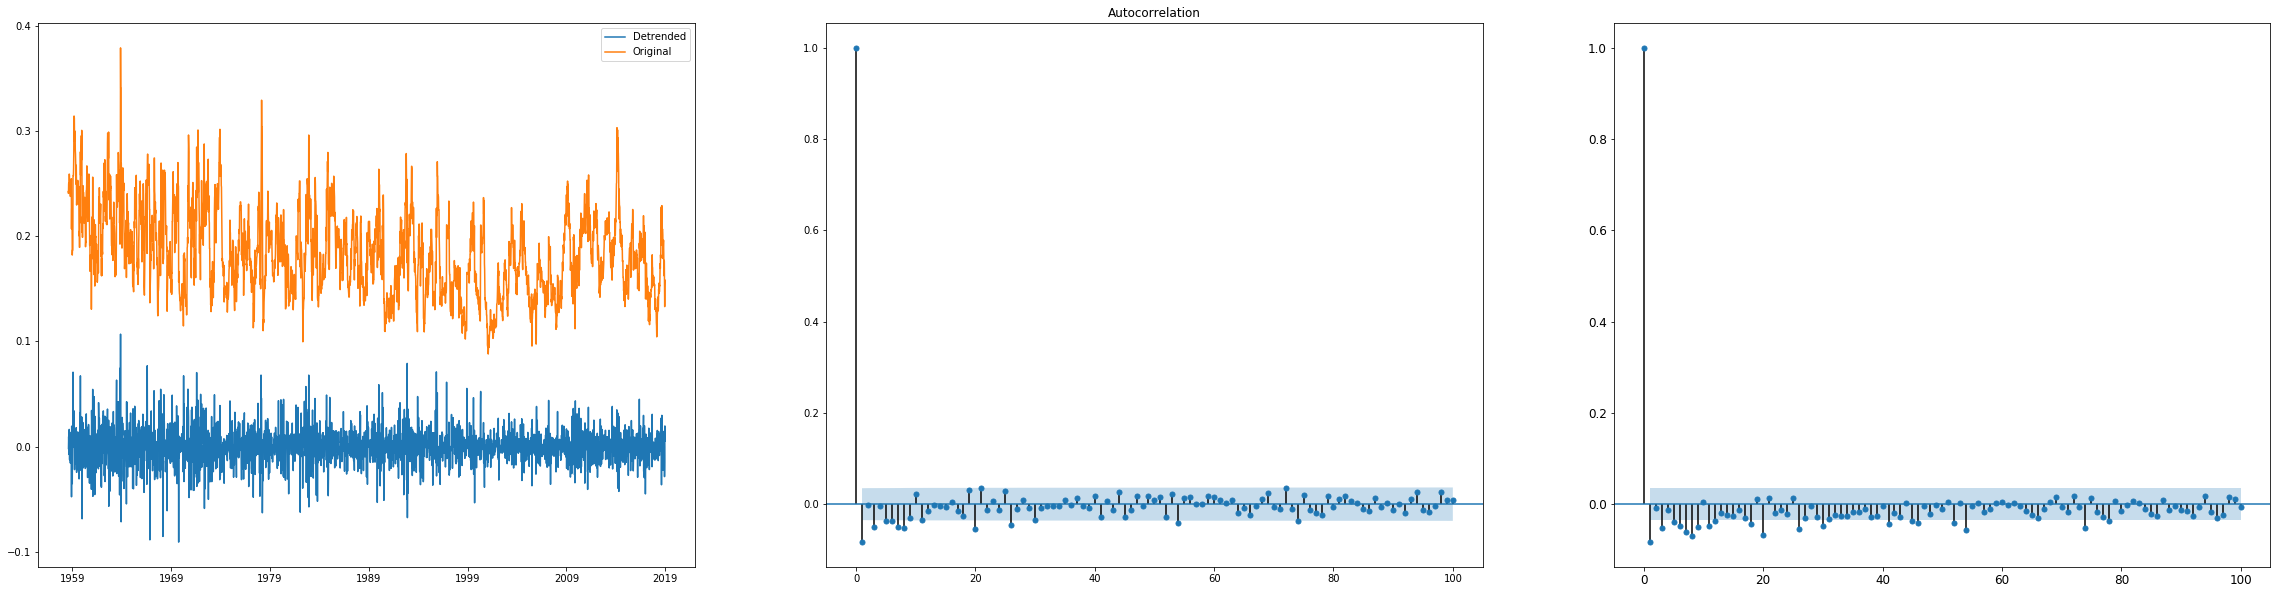

cat10_avg


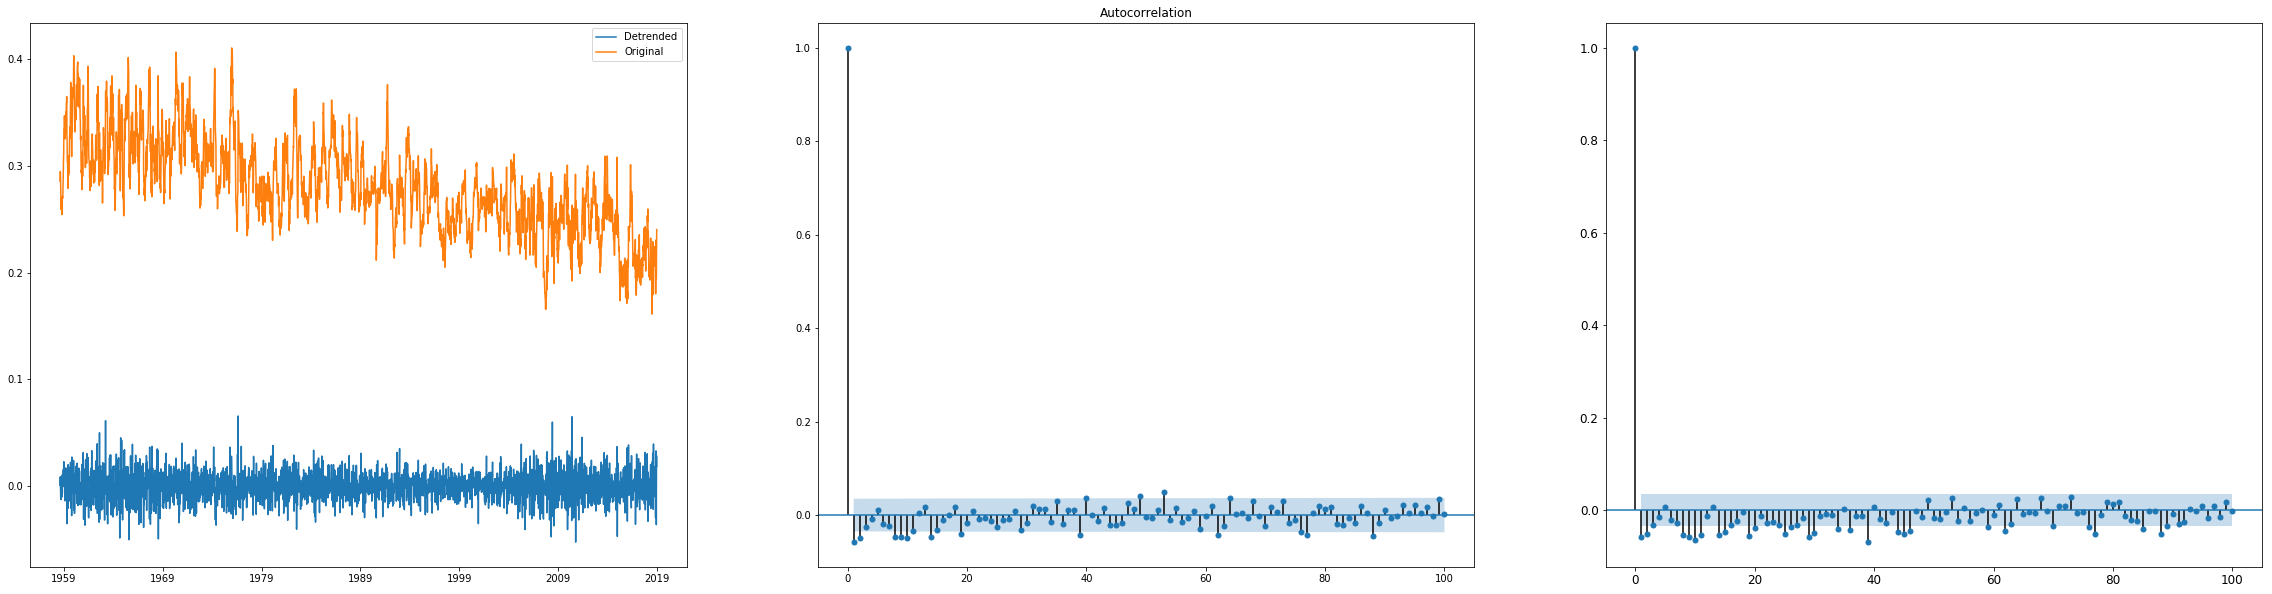

In [161]:
for i in range(len(target_values)):
    print(target_values[i])
    data = lda[target_values[i]]
    detrended_data = [i-j for i, j in zip(data[1:], data[:-1])]
    plt.subplots(1, 3, figsize=(40, 10))
    ax = plt.subplot(1, 3, 1)
    plt.plot(lda.loc[1:, "timestep"], detrended_data, label="Detrended")
    plt.plot(lda["timestep"], data,  label="Original")
    plt.legend()
    ax = plt.subplot(1, 3, 2)
    plot_acf(detrended_data, ax = ax, lags=100)
    ax = plt.subplot(1, 3, 3)
    plot_pacf(detrended_data, ax = ax, lags=100)
    plt.show()

In [ ]:
lda_month = lda.copy()

In [ ]:
lda_month["MonthID"] = [i.year + (i.month - 1)/ 12 for i in lda_month["timestep"]]
lda_month["Month"] = [i.month for i in lda_month["timestep"]]
lda_month["Year"] = [i.year for i in lda_month["timestep"]]
lda_month_agg = pd.DataFrame(lda_month.groupby("MonthID").mean()).reset_index()

In [ ]:
lda_month_agg.head()

In [140]:
for i in range(len(target_values)):
    data = lda_month_agg[target_values[i]]
    lda_month_agg["{}_detrended".format(target_values[i])] = [np.nan] + [i-j for i, j in zip(data[1:], data[:-1])]

In [141]:
startTime = 1967 + 1/12; endTime=2019
lda_month_agg = lda_month_agg[lda_month_agg["MonthID"] >= startTime].copy()
lda_month_agg["MonthID"] = [i*12 + j for i, j in lda_month_agg[["Year", "Month"]].values.tolist()]
lda_month_agg = lda_month_agg.drop(["Month", "Year"], axis=1).reset_index(drop=True)

In [142]:
lda_month_agg = lda_month_agg.reset_index(drop=True)

In [143]:
lda_month_agg.head()

,MonthID,cat0_avg,cat1_avg,cat2_avg,cat3_avg,cat4_avg,cat5_avg,cat6_avg,cat7_avg,cat8_avg,cat9_avg,cat10_avg,cat0_avg_detrended,cat1_avg_detrended,cat2_avg_detrended,cat3_avg_detrended,cat4_avg_detrended,cat5_avg_detrended,cat6_avg_detrended,cat7_avg_detrended,cat8_avg_detrended,cat9_avg_detrended,cat10_avg_detrended
0,23606,0.200723,0.284766,0.407976,0.331593,0.234274,0.202242,0.217612,0.191187,0.033706,0.203303,0.278743,-0.069042,-0.048844,0.037930,0.002102,0.016207,-0.008594,-0.010597,0.061997,0.033706,-0.004401,-0.038519
1,23607,0.198508,0.311500,0.403727,0.335531,0.230870,0.193549,0.231526,0.112184,0.044941,0.183729,0.273775,-0.002215,0.026734,-0.004249,0.003939,-0.003403,-0.008693,0.013914,-0.079003,0.011235,-0.019574,-0.004968
2,23608,0.211564,0.314926,0.386028,0.334890,0.204012,0.165804,0.227149,0.107026,0.044941,0.253378,0.297252,0.013056,0.003426,-0.017699,-0.000641,-0.026859,-0.027745,-0.004377,-0.005158,0.000000,0.069648,0.023477
3,23609,0.215014,0.291681,0.404675,0.359084,0.199387,0.147695,0.172596,0.127563,0.048627,0.228618,0.304305,0.003450,-0.023245,0.018647,0.024194,-0.004625,-0.018109,-0.054553,0.020537,0.003686,-0.024760,0.007053
4,23610,0.242854,0.322881,0.375230,0.381099,0.199572,0.181888,0.206542,0.109756,0.063018,0.210420,0.323679,0.027840,0.031200,-0.029445,0.022015,0.000185,0.034192,0.033946,-0.017807,0.014391,-0.018198,0.019374


In [145]:
lda_month_agg.to_csv("../data/lda_monthly_cat.csv")

In [146]:
lda = pd.read_csv("../data/lda_monthly_cat.csv")

In [147]:
lda.head()

,Unnamed: 0,MonthID,cat0_avg,cat1_avg,cat2_avg,cat3_avg,cat4_avg,cat5_avg,cat6_avg,cat7_avg,cat8_avg,cat9_avg,cat10_avg,cat0_avg_detrended,cat1_avg_detrended,cat2_avg_detrended,cat3_avg_detrended,cat4_avg_detrended,cat5_avg_detrended,cat6_avg_detrended,cat7_avg_detrended,cat8_avg_detrended,cat9_avg_detrended,cat10_avg_detrended
0,0,23606,0.200723,0.284766,0.407976,0.331593,0.234274,0.202242,0.217612,0.191187,0.033706,0.203303,0.278743,-0.069042,-0.048844,0.037930,0.002102,0.016207,-0.008594,-0.010597,0.061997,0.033706,-0.004401,-0.038519
1,1,23607,0.198508,0.311500,0.403727,0.335531,0.230870,0.193549,0.231526,0.112184,0.044941,0.183729,0.273775,-0.002215,0.026734,-0.004249,0.003939,-0.003403,-0.008693,0.013914,-0.079003,0.011235,-0.019574,-0.004968
2,2,23608,0.211564,0.314926,0.386028,0.334890,0.204012,0.165804,0.227149,0.107026,0.044941,0.253378,0.297252,0.013056,0.003426,-0.017699,-0.000641,-0.026859,-0.027745,-0.004377,-0.005158,0.000000,0.069648,0.023477
3,3,23609,0.215014,0.291681,0.404675,0.359084,0.199387,0.147695,0.172596,0.127563,0.048627,0.228618,0.304305,0.003450,-0.023245,0.018647,0.024194,-0.004625,-0.018109,-0.054553,0.020537,0.003686,-0.024760,0.007053
4,4,23610,0.242854,0.322881,0.375230,0.381099,0.199572,0.181888,0.206542,0.109756,0.063018,0.210420,0.323679,0.027840,0.031200,-0.029445,0.022015,0.000185,0.034192,0.033946,-0.017807,0.014391,-0.018198,0.019374
